In [1]:
import pypsa
import xarray as xr

In [2]:
n = pypsa.Network("test/base_s_1__none_2045_lt.nc")

n.optimize.fix_optimal_capacities()
n.optimize.create_model()

print()


INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}


Linopy LP model

Variables:
----------
 * Generator-p (snapshot, Generator)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)

Constraints:
------------
 * Generator-fix-p-lower (snapshot, Generator-fix)
 * Generator-fix-p-upper (snapshot, Generator-fix)
 * Link-fix-p-lower (snapshot, Link-fix)
 * Link-fix-p-upper (snapshot, Link-fix)
 * Store-fix-e-lower (snapshot, Store-fix)
 * Store-fix-e-upper (snapshot, Store-fix)
 * StorageUnit-fix-p_dispatch-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_dispatch-upper (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_store-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_store-upper (snapshot, StorageUnit-fix)
 * StorageUnit-fix-state_of_charge-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-state_o

In [45]:
cf_onwind_2045 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2045"}).rhs / n.generators.p_nom["DE0 0 onwind-2045"]
cf_onwind_2040 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2040"}).rhs / n.generators.p_nom["DE0 0 onwind-2040"]
cf_onwind_2035 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2035"}).rhs / n.generators.p_nom["DE0 0 onwind-2035"]
cf_onwind_2030 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2030"}).rhs / n.generators.p_nom["DE0 0 onwind-2030"]
cf_onwind_2025 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2025"}).rhs / n.generators.p_nom["DE0 0 onwind-2025"]
cf_onwind_2020 = n.model.constraints["Generator-fix-p-upper"].sel({"Generator-fix": "DE0 0 onwind-2020"}).rhs / n.generators.p_nom["DE0 0 onwind-2020"]


In [55]:
n.generators.lifetime["DE0 0 offwind-dc-2025"]

30.0

In [22]:
import numpy as np

In [43]:
cf_onwind_2030.data

array([0.47870898, 0.61818876, 0.71015604, ..., 0.17762537, 0.14780472,
       0.10291334])

In [27]:
print(np.array_equal(cf_onwind_2045.data.round(3), cf_onwind_2030.data.round(3)))

False


In [68]:
m = pypsa.Network("test/base_s_1__none_2045_lt.nc")

m.optimize.fix_optimal_capacities()
m.optimize.create_model()


INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}


Linopy LP model

Variables:
----------
 * Generator-p (snapshot, Generator)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)

Constraints:
------------
 * Generator-fix-p-lower (snapshot, Generator-fix)
 * Generator-fix-p-upper (snapshot, Generator-fix)
 * Link-fix-p-lower (snapshot, Link-fix)
 * Link-fix-p-upper (snapshot, Link-fix)
 * Store-fix-e-lower (snapshot, Store-fix)
 * Store-fix-e-upper (snapshot, Store-fix)
 * StorageUnit-fix-p_dispatch-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_dispatch-upper (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_store-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_store-upper (snapshot, StorageUnit-fix)
 * StorageUnit-fix-state_of_charge-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-state_o

In [69]:
m.optimize.optimize_with_rolling_horizon(
    solver_name="gurobi",
    horizon=3000,
    overlap=0,
)

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-12-31 21:00:00] (1/1).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]
INFO:linopy.io: Writing time: 9.42s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kw31ak1p.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kw31ak1p.lp


Reading time = 3.27 seconds


INFO:gurobipy:Reading time = 3.27 seconds


obj: 1442481 rows, 712467 columns, 2747706 nonzeros


INFO:gurobipy:obj: 1442481 rows, 712467 columns, 2747706 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1442481 rows, 712467 columns and 2747706 nonzeros


INFO:gurobipy:Optimize a model with 1442481 rows, 712467 columns and 2747706 nonzeros


Model fingerprint: 0x706770b8


INFO:gurobipy:Model fingerprint: 0x706770b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 7e+02]


INFO:gurobipy:  Bounds range     [2e+01, 7e+02]


  RHS range        [1e-14, 2e+08]


INFO:gurobipy:  RHS range        [1e-14, 2e+08]


Presolve removed 1375442 rows and 269290 columns


INFO:gurobipy:Presolve removed 1375442 rows and 269290 columns


Presolve time: 2.71s


INFO:gurobipy:Presolve time: 2.71s


Presolved: 67039 rows, 443177 columns, 982536 nonzeros


INFO:gurobipy:Presolved: 67039 rows, 443177 columns, 982536 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 1.990e+05


INFO:gurobipy: AA' NZ     : 1.990e+05


 Factor NZ  : 1.666e+06 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.666e+06 (roughly 200 MB of memory)


 Factor Ops : 6.984e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.984e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.01494862e+14 -2.58738544e+15  1.28e+11 1.76e+01  2.86e+10     3s


INFO:gurobipy:   0   1.01494862e+14 -2.58738544e+15  1.28e+11 1.76e+01  2.86e+10     3s


   1   1.86976585e+13 -2.08440180e+14  2.19e+10 2.10e-12  4.58e+09     3s


INFO:gurobipy:   1   1.86976585e+13 -2.08440180e+14  2.19e+10 2.10e-12  4.58e+09     3s


   2   2.29768586e+12 -6.07800877e+13  2.16e+09 8.94e-01  4.89e+08     4s


INFO:gurobipy:   2   2.29768586e+12 -6.07800877e+13  2.16e+09 8.94e-01  4.89e+08     4s


   3   4.85519176e+11 -1.85125029e+13  1.35e+08 6.33e-02  4.45e+07     4s


INFO:gurobipy:   3   4.85519176e+11 -1.85125029e+13  1.35e+08 6.33e-02  4.45e+07     4s


   4   2.88732691e+11 -5.48163388e+12  3.99e+07 1.37e-11  1.21e+07     4s


INFO:gurobipy:   4   2.88732691e+11 -5.48163388e+12  3.99e+07 1.37e-11  1.21e+07     4s


   5   2.35748468e+11 -2.53994400e+12  3.11e+07 1.28e-11  6.69e+06     4s


INFO:gurobipy:   5   2.35748468e+11 -2.53994400e+12  3.11e+07 1.28e-11  6.69e+06     4s


   6   1.53300928e+11 -1.79262944e+12  2.01e+07 1.01e-11  4.32e+06     4s


INFO:gurobipy:   6   1.53300928e+11 -1.79262944e+12  2.01e+07 1.01e-11  4.32e+06     4s


   7   1.15221933e+11 -1.49089684e+12  1.48e+07 7.34e-12  3.31e+06     4s


INFO:gurobipy:   7   1.15221933e+11 -1.49089684e+12  1.48e+07 7.34e-12  3.31e+06     4s


   8   9.34386446e+10 -1.14042862e+12  1.14e+07 4.61e-12  2.46e+06     4s


INFO:gurobipy:   8   9.34386446e+10 -1.14042862e+12  1.14e+07 4.61e-12  2.46e+06     4s


   9   5.04919013e+10 -3.23663358e+11  3.09e+06 9.21e-12  6.53e+05     4s


INFO:gurobipy:   9   5.04919013e+10 -3.23663358e+11  3.09e+06 9.21e-12  6.53e+05     4s


  10   2.89142338e+10 -7.43584421e+10  3.53e+05 2.85e-12  1.37e+05     5s


INFO:gurobipy:  10   2.89142338e+10 -7.43584421e+10  3.53e+05 2.85e-12  1.37e+05     5s


  11   2.35081235e+10 -2.79279452e+10  1.02e+05 1.94e-12  6.35e+04     5s


INFO:gurobipy:  11   2.35081235e+10 -2.79279452e+10  1.02e+05 1.94e-12  6.35e+04     5s


  12   2.23120720e+10 -1.31000605e+10  7.78e+04 1.94e-12  4.40e+04     5s


INFO:gurobipy:  12   2.23120720e+10 -1.31000605e+10  7.78e+04 1.94e-12  4.40e+04     5s


  13   2.13428280e+10 -4.88525196e+09  6.20e+04 3.25e-06  3.28e+04     5s


INFO:gurobipy:  13   2.13428280e+10 -4.88525196e+09  6.20e+04 3.25e-06  3.28e+04     5s


  14   2.04262926e+10 -5.61120736e+08  4.93e+04 9.89e-06  2.62e+04     5s


INFO:gurobipy:  14   2.04262926e+10 -5.61120736e+08  4.93e+04 9.89e-06  2.62e+04     5s


  15   1.95337508e+10  3.62730575e+09  3.84e+04 1.93e-05  1.99e+04     5s


INFO:gurobipy:  15   1.95337508e+10  3.62730575e+09  3.84e+04 1.93e-05  1.99e+04     5s


  16   1.82809809e+10  6.15528098e+09  2.54e+04 2.95e-05  1.50e+04     5s


INFO:gurobipy:  16   1.82809809e+10  6.15528098e+09  2.54e+04 2.95e-05  1.50e+04     5s


  17   1.75728197e+10  9.99008558e+09  1.93e+04 4.24e-05  9.52e+03     6s


INFO:gurobipy:  17   1.75728197e+10  9.99008558e+09  1.93e+04 4.24e-05  9.52e+03     6s


  18   1.69517989e+10  1.18955499e+10  1.41e+04 4.62e-05  6.41e+03     6s


INFO:gurobipy:  18   1.69517989e+10  1.18955499e+10  1.41e+04 4.62e-05  6.41e+03     6s


  19   1.64127554e+10  1.27571118e+10  9.93e+03 4.92e-05  4.62e+03     6s


INFO:gurobipy:  19   1.64127554e+10  1.27571118e+10  9.93e+03 4.92e-05  4.62e+03     6s


  20   1.61256197e+10  1.32951946e+10  7.78e+03 4.81e-05  3.58e+03     6s


INFO:gurobipy:  20   1.61256197e+10  1.32951946e+10  7.78e+03 4.81e-05  3.58e+03     6s


  21   1.59432537e+10  1.37640943e+10  6.50e+03 4.52e-05  2.78e+03     6s


INFO:gurobipy:  21   1.59432537e+10  1.37640943e+10  6.50e+03 4.52e-05  2.78e+03     6s


  22   1.57434659e+10  1.41821384e+10  5.09e+03 4.00e-05  2.02e+03     6s


INFO:gurobipy:  22   1.57434659e+10  1.41821384e+10  5.09e+03 4.00e-05  2.02e+03     6s


  23   1.54652638e+10  1.45077854e+10  3.18e+03 3.39e-05  1.24e+03     7s


INFO:gurobipy:  23   1.54652638e+10  1.45077854e+10  3.18e+03 3.39e-05  1.24e+03     7s


  24   1.53110917e+10  1.46443559e+10  2.17e+03 2.85e-05  8.59e+02     7s


INFO:gurobipy:  24   1.53110917e+10  1.46443559e+10  2.17e+03 2.85e-05  8.59e+02     7s


  25   1.52188111e+10  1.47538248e+10  1.56e+03 2.26e-05  6.01e+02     7s


INFO:gurobipy:  25   1.52188111e+10  1.47538248e+10  1.56e+03 2.26e-05  6.01e+02     7s


  26   1.51444084e+10  1.47957527e+10  1.06e+03 1.97e-05  4.44e+02     7s


INFO:gurobipy:  26   1.51444084e+10  1.47957527e+10  1.06e+03 1.97e-05  4.44e+02     7s


  27   1.51363375e+10  1.48144093e+10  1.01e+03 1.83e-05  4.12e+02     7s


INFO:gurobipy:  27   1.51363375e+10  1.48144093e+10  1.01e+03 1.83e-05  4.12e+02     7s


  28   1.51175312e+10  1.48389239e+10  8.78e+02 1.63e-05  3.57e+02     7s


INFO:gurobipy:  28   1.51175312e+10  1.48389239e+10  8.78e+02 1.63e-05  3.57e+02     7s


  29   1.50690175e+10  1.48781846e+10  5.54e+02 1.29e-05  2.42e+02     7s


INFO:gurobipy:  29   1.50690175e+10  1.48781846e+10  5.54e+02 1.29e-05  2.42e+02     7s


  30   1.50629108e+10  1.48872217e+10  5.15e+02 1.21e-05  2.23e+02     8s


INFO:gurobipy:  30   1.50629108e+10  1.48872217e+10  5.15e+02 1.21e-05  2.23e+02     8s


  31   1.50415407e+10  1.49291058e+10  3.73e+02 7.82e-06  1.45e+02     8s


INFO:gurobipy:  31   1.50415407e+10  1.49291058e+10  3.73e+02 7.82e-06  1.45e+02     8s


  32   1.50240227e+10  1.49440796e+10  2.59e+02 6.12e-06  1.03e+02     8s


INFO:gurobipy:  32   1.50240227e+10  1.49440796e+10  2.59e+02 6.12e-06  1.03e+02     8s


  33   1.50102903e+10  1.49562997e+10  1.70e+02 4.56e-06  6.91e+01     8s


INFO:gurobipy:  33   1.50102903e+10  1.49562997e+10  1.70e+02 4.56e-06  6.91e+01     8s


  34   1.50033722e+10  1.49660488e+10  1.27e+02 3.18e-06  4.83e+01     8s


INFO:gurobipy:  34   1.50033722e+10  1.49660488e+10  1.27e+02 3.18e-06  4.83e+01     8s


  35   1.49980880e+10  1.49708932e+10  9.46e+01 2.43e-06  3.54e+01     8s


INFO:gurobipy:  35   1.49980880e+10  1.49708932e+10  9.46e+01 2.43e-06  3.54e+01     8s


  36   1.49942348e+10  1.49721405e+10  7.08e+01 2.23e-06  2.83e+01     9s


INFO:gurobipy:  36   1.49942348e+10  1.49721405e+10  7.08e+01 2.23e-06  2.83e+01     9s


  37   1.49918318e+10  1.49752957e+10  5.58e+01 1.64e-06  2.14e+01     9s


INFO:gurobipy:  37   1.49918318e+10  1.49752957e+10  5.58e+01 1.64e-06  2.14e+01     9s


  38   1.49877315e+10  1.49778026e+10  3.09e+01 1.19e-06  1.27e+01     9s


INFO:gurobipy:  38   1.49877315e+10  1.49778026e+10  3.09e+01 1.19e-06  1.27e+01     9s


  39   1.49861487e+10  1.49793408e+10  2.14e+01 9.00e-07  8.69e+00     9s


INFO:gurobipy:  39   1.49861487e+10  1.49793408e+10  2.14e+01 9.00e-07  8.69e+00     9s


  40   1.49851841e+10  1.49800945e+10  1.57e+01 7.67e-07  6.45e+00     9s


INFO:gurobipy:  40   1.49851841e+10  1.49800945e+10  1.57e+01 7.67e-07  6.45e+00     9s


  41   1.49846383e+10  1.49808885e+10  1.25e+01 6.58e-07  4.80e+00     9s


INFO:gurobipy:  41   1.49846383e+10  1.49808885e+10  1.25e+01 6.58e-07  4.80e+00     9s


  42   1.49838720e+10  1.49813297e+10  7.96e+00 6.23e-07  3.17e+00     9s


INFO:gurobipy:  42   1.49838720e+10  1.49813297e+10  7.96e+00 6.23e-07  3.17e+00     9s


  43   1.49834249e+10  1.49815054e+10  5.37e+00 5.91e-07  2.31e+00    10s


INFO:gurobipy:  43   1.49834249e+10  1.49815054e+10  5.37e+00 5.91e-07  2.31e+00    10s


  44   1.49832254e+10  1.49817181e+10  4.21e+00 5.26e-07  1.79e+00    10s


INFO:gurobipy:  44   1.49832254e+10  1.49817181e+10  4.21e+00 5.26e-07  1.79e+00    10s


  45   1.49830343e+10  1.49819071e+10  3.11e+00 4.72e-07  1.32e+00    10s


INFO:gurobipy:  45   1.49830343e+10  1.49819071e+10  3.11e+00 4.72e-07  1.32e+00    10s


  46   1.49829688e+10  1.49819645e+10  2.73e+00 4.49e-07  1.16e+00    10s


INFO:gurobipy:  46   1.49829688e+10  1.49819645e+10  2.73e+00 4.49e-07  1.16e+00    10s


  47   1.49829277e+10  1.49819860e+10  2.51e+00 4.39e-07  1.08e+00    10s


INFO:gurobipy:  47   1.49829277e+10  1.49819860e+10  2.51e+00 4.39e-07  1.08e+00    10s


  48   1.49827542e+10  1.49821579e+10  1.52e+00 3.54e-07  6.54e-01    10s


INFO:gurobipy:  48   1.49827542e+10  1.49821579e+10  1.52e+00 3.54e-07  6.54e-01    10s


  49   1.49826000e+10  1.49822826e+10  6.79e-01 2.54e-07  3.05e-01    11s


INFO:gurobipy:  49   1.49826000e+10  1.49822826e+10  6.79e-01 2.54e-07  3.05e-01    11s


  50   1.49825165e+10  1.49823552e+10  2.37e-01 1.61e-07  1.21e-01    11s


INFO:gurobipy:  50   1.49825165e+10  1.49823552e+10  2.37e-01 1.61e-07  1.21e-01    11s


  51   1.49824955e+10  1.49823769e+10  1.29e-01 1.34e-07  7.91e-02    11s


INFO:gurobipy:  51   1.49824955e+10  1.49823769e+10  1.29e-01 1.34e-07  7.91e-02    11s


  52   1.49824871e+10  1.49824120e+10  8.68e-02 8.61e-08  5.04e-02    11s


INFO:gurobipy:  52   1.49824871e+10  1.49824120e+10  8.68e-02 8.61e-08  5.04e-02    11s


  53   1.49824786e+10  1.49824394e+10  4.47e-02 4.70e-08  2.57e-02    11s


INFO:gurobipy:  53   1.49824786e+10  1.49824394e+10  4.47e-02 4.70e-08  2.57e-02    11s


  54   1.49824727e+10  1.49824526e+10  1.70e-02 2.70e-08  1.17e-02    11s


INFO:gurobipy:  54   1.49824727e+10  1.49824526e+10  1.70e-02 2.70e-08  1.17e-02    11s


  55   1.49824710e+10  1.49824604e+10  9.36e-03 1.47e-08  6.25e-03    12s


INFO:gurobipy:  55   1.49824710e+10  1.49824604e+10  9.36e-03 1.47e-08  6.25e-03    12s


  56   1.49824695e+10  1.49824658e+10  2.58e-03 1.08e-08  2.04e-03    12s


INFO:gurobipy:  56   1.49824695e+10  1.49824658e+10  2.58e-03 1.08e-08  2.04e-03    12s


  57   1.49824691e+10  1.49824676e+10  1.10e-03 1.27e-08  8.71e-04    12s


INFO:gurobipy:  57   1.49824691e+10  1.49824676e+10  1.10e-03 1.27e-08  8.71e-04    12s


  58   1.49824689e+10  1.49824684e+10  2.99e-04 1.27e-08  2.86e-04    12s


INFO:gurobipy:  58   1.49824689e+10  1.49824684e+10  2.99e-04 1.27e-08  2.86e-04    12s


  59   1.49824689e+10  1.49824687e+10  6.77e-05 6.59e-09  8.82e-05    12s


INFO:gurobipy:  59   1.49824689e+10  1.49824687e+10  6.77e-05 6.59e-09  8.82e-05    12s


  60   1.49824689e+10  1.49824688e+10  3.75e-05 1.56e-09  2.56e-05    12s


INFO:gurobipy:  60   1.49824689e+10  1.49824688e+10  3.75e-05 1.56e-09  2.56e-05    12s


  61   1.49824688e+10  1.49824688e+10  6.85e-07 6.13e-10  2.76e-06    12s


INFO:gurobipy:  61   1.49824688e+10  1.49824688e+10  6.85e-07 6.13e-10  2.76e-06    12s


  62   1.49824688e+10  1.49824688e+10  1.46e-06 2.10e-10  4.05e-07    12s


INFO:gurobipy:  62   1.49824688e+10  1.49824688e+10  1.46e-06 2.10e-10  4.05e-07    12s


  63   1.49824688e+10  1.49824688e+10  9.24e-07 2.21e-10  7.31e-08    13s


INFO:gurobipy:  63   1.49824688e+10  1.49824688e+10  9.24e-07 2.21e-10  7.31e-08    13s


  64   1.49824688e+10  1.49824688e+10  8.05e-07 2.22e-10  1.48e-08    13s


INFO:gurobipy:  64   1.49824688e+10  1.49824688e+10  8.05e-07 2.22e-10  1.48e-08    13s


  65   1.49824688e+10  1.49824688e+10  9.83e-07 2.21e-10  3.36e-09    13s


INFO:gurobipy:  65   1.49824688e+10  1.49824688e+10  9.83e-07 2.21e-10  3.36e-09    13s


INFO:gurobipy:


Barrier solved model in 65 iterations and 12.87 seconds (8.88 work units)


INFO:gurobipy:Barrier solved model in 65 iterations and 12.87 seconds (8.88 work units)


Optimal objective 1.49824688e+10


INFO:gurobipy:Optimal objective 1.49824688e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9865 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:    9865 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   25816 PPushes remaining with PInf 1.5543499e-03                13s


INFO:gurobipy:   25816 PPushes remaining with PInf 1.5543499e-03                13s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9599590e-04     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9599590e-04     14s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   35684    1.4982469e+10   0.000000e+00   1.959958e-04     14s


INFO:gurobipy:   35684    1.4982469e+10   0.000000e+00   1.959958e-04     14s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   35694    1.4982469e+10   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   35694    1.4982469e+10   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 35694 iterations and 15.49 seconds (9.86 work units)


INFO:gurobipy:Solved in 35694 iterations and 15.49 seconds (9.86 work units)


Optimal objective  1.498246885e+10


INFO:gurobipy:Optimal objective  1.498246885e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 712467 primals, 1442481 duals
Objective: 1.50e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


In [73]:
m.buses_t.marginal_price.mean()

DE                                    0.000000
DE gas                               25.635258
DE gas primary                       24.600876
DE industry methanol                 25.259130
DE methanol                          25.252091
DE oil                               55.750662
DE oil primary                       52.921214
DE renewable gas                     25.625312
DE renewable oil                     55.740498
DE shipping methanol                 25.259709
DE0 0                                16.988506
DE0 0 EV battery                     17.790483
DE0 0 H2                             19.219419
DE0 0 agriculture machinery oil      55.757887
DE0 0 battery                        17.146708
DE0 0 coal for industry               9.570712
DE0 0 gas for industry               28.516242
DE0 0 kerosene for aviation          55.761039
DE0 0 land transport oil             55.758369
DE0 0 naphtha for industry           55.763877
DE0 0 rural heat                      9.947872
DE0 0 rural w

In [75]:
n_without_fixation = pypsa.Network('base_s_1__none_2045_lt.nc')

n_without_fixation.optimize.create_model()


INFO:pypsa.io:Imported network base_s_1__none_2045_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}


Linopy LP model

Variables:
----------
 * Generator-p_nom (Generator-ext)
 * Link-p_nom (Link-ext)
 * Store-e_nom (Store-ext)
 * Generator-p (snapshot, Generator)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)

Constraints:
------------
 * Generator-ext-p_nom-lower (Generator-ext)
 * Generator-ext-p_nom-upper (Generator-ext)
 * Link-ext-p_nom-lower (Link-ext)
 * Link-ext-p_nom-upper (Link-ext)
 * Store-ext-e_nom-lower (Store-ext)
 * Store-ext-e_nom-upper (Store-ext)
 * Generator-fix-p-lower (snapshot, Generator-fix)
 * Generator-fix-p-upper (snapshot, Generator-fix)
 * Generator-ext-p-lower (snapshot, Generator-ext)
 * Generator-ext-p-upper (snapshot, Generator-ext)
 * Link-fix-p-lower (snapshot, Link-fix)
 * Link-fix-p-upper (snapshot, Link-fix)
 * Link-

In [76]:
n_without_fixation.optimize.solve_model(
    solver_name="gurobi"
)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 11/11 [00:01<00:00,  7.06it/s]
INFO:linopy.io: Writing time: 11.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3ibdcw2e.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3ibdcw2e.lp


Reading time = 3.28 seconds


INFO:gurobipy:Reading time = 3.28 seconds


obj: 1442568 rows, 712548 columns, 2990256 nonzeros


INFO:gurobipy:obj: 1442568 rows, 712548 columns, 2990256 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1442568 rows, 712548 columns and 2990256 nonzeros


INFO:gurobipy:Optimize a model with 1442568 rows, 712548 columns and 2990256 nonzeros


Model fingerprint: 0x098bbcae


INFO:gurobipy:Model fingerprint: 0x098bbcae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 1e+06]


INFO:gurobipy:  Objective range  [3e-02, 1e+06]


  Bounds range     [2e+01, 7e+02]


INFO:gurobipy:  Bounds range     [2e+01, 7e+02]


  RHS range        [3e-01, 1e+09]


INFO:gurobipy:  RHS range        [3e-01, 1e+09]


Presolve removed 1232238 rows and 223141 columns


INFO:gurobipy:Presolve removed 1232238 rows and 223141 columns


Presolve time: 2.88s


INFO:gurobipy:Presolve time: 2.88s


Presolved: 210330 rows, 489407 columns, 1295492 nonzeros


INFO:gurobipy:Presolved: 210330 rows, 489407 columns, 1295492 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.20s


INFO:gurobipy:Ordering time: 0.20s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 49


INFO:gurobipy: Dense cols : 49


 AA' NZ     : 6.923e+05


INFO:gurobipy: AA' NZ     : 6.923e+05


 Factor NZ  : 4.313e+06 (roughly 300 MB of memory)


INFO:gurobipy: Factor NZ  : 4.313e+06 (roughly 300 MB of memory)


 Factor Ops : 2.191e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.191e+08 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.12128037e+14 -3.56384406e+16  8.17e+08 9.25e+01  2.30e+12     4s


INFO:gurobipy:   0   8.12128037e+14 -3.56384406e+16  8.17e+08 9.25e+01  2.30e+12     4s


   1   7.71446463e+14 -1.61684498e+16  6.43e+08 9.20e+03  1.55e+12     4s


INFO:gurobipy:   1   7.71446463e+14 -1.61684498e+16  6.43e+08 9.20e+03  1.55e+12     4s


   2   6.43320904e+14 -1.15801566e+16  3.88e+08 4.18e+03  9.42e+11     4s


INFO:gurobipy:   2   6.43320904e+14 -1.15801566e+16  3.88e+08 4.18e+03  9.42e+11     4s


   3   5.21486751e+14 -7.32341307e+15  1.28e+08 7.64e+02  3.13e+11     5s


INFO:gurobipy:   3   5.21486751e+14 -7.32341307e+15  1.28e+08 7.64e+02  3.13e+11     5s


   4   4.32135218e+14 -5.17115617e+15  4.46e+07 2.37e+02  1.11e+11     5s


INFO:gurobipy:   4   4.32135218e+14 -5.17115617e+15  4.46e+07 2.37e+02  1.11e+11     5s


   5   3.45736859e+14 -3.85787005e+15  1.45e+07 1.11e+02  3.87e+10     5s


INFO:gurobipy:   5   3.45736859e+14 -3.85787005e+15  1.45e+07 1.11e+02  3.87e+10     5s


   6   2.19187175e+14 -2.25927590e+15  4.18e+06 3.98e+01  1.21e+10     5s


INFO:gurobipy:   6   2.19187175e+14 -2.25927590e+15  4.18e+06 3.98e+01  1.21e+10     5s


   7   1.19950846e+14 -1.06881519e+15  1.31e+06 1.08e+01  4.01e+09     6s


INFO:gurobipy:   7   1.19950846e+14 -1.06881519e+15  1.31e+06 1.08e+01  4.01e+09     6s


   8   9.74835681e+13 -1.00953997e+15  9.26e+05 1.00e+01  3.11e+09     6s


INFO:gurobipy:   8   9.74835681e+13 -1.00953997e+15  9.26e+05 1.00e+01  3.11e+09     6s


   9   3.72412926e+13 -2.83051861e+14  1.41e+05 7.39e-01  5.75e+08     6s


INFO:gurobipy:   9   3.72412926e+13 -2.83051861e+14  1.41e+05 7.39e-01  5.75e+08     6s


  10   6.55606016e+12 -8.61537877e+13  1.16e+04 1.26e-01  1.10e+08     6s


INFO:gurobipy:  10   6.55606016e+12 -8.61537877e+13  1.16e+04 1.26e-01  1.10e+08     6s


  11   2.80828061e+12 -1.90853604e+13  2.87e+03 2.19e-02  2.43e+07     7s


INFO:gurobipy:  11   2.80828061e+12 -1.90853604e+13  2.87e+03 2.19e-02  2.43e+07     7s


  12   1.30398193e+12 -7.48132520e+12  1.08e+03 5.17e-03  9.46e+06     7s


INFO:gurobipy:  12   1.30398193e+12 -7.48132520e+12  1.08e+03 5.17e-03  9.46e+06     7s


  13   9.30210539e+11 -3.43765912e+12  6.76e+02 1.29e-03  4.68e+06     7s


INFO:gurobipy:  13   9.30210539e+11 -3.43765912e+12  6.76e+02 1.29e-03  4.68e+06     7s


  14   6.27409485e+11 -1.27300761e+12  4.13e+02 8.00e-10  2.03e+06     7s


INFO:gurobipy:  14   6.27409485e+11 -1.27300761e+12  4.13e+02 8.00e-10  2.03e+06     7s


  15   5.30403650e+11 -5.72867616e+11  3.39e+02 2.18e-10  1.18e+06     7s


INFO:gurobipy:  15   5.30403650e+11 -5.72867616e+11  3.39e+02 2.18e-10  1.18e+06     7s


  16   2.31342420e+11 -1.89674643e+11  1.16e+02 1.08e-09  4.46e+05     8s


INFO:gurobipy:  16   2.31342420e+11 -1.89674643e+11  1.16e+02 1.08e-09  4.46e+05     8s


  17   1.38891864e+11 -7.91557053e+10  5.95e+01 4.21e-11  2.30e+05     8s


INFO:gurobipy:  17   1.38891864e+11 -7.91557053e+10  5.95e+01 4.21e-11  2.30e+05     8s


  18   8.40357709e+10 -1.73900470e+10  2.89e+01 6.40e-10  1.07e+05     8s


INFO:gurobipy:  18   8.40357709e+10 -1.73900470e+10  2.89e+01 6.40e-10  1.07e+05     8s


  19   5.63462343e+10  5.10924099e+09  1.46e+01 2.33e-10  5.39e+04     8s


INFO:gurobipy:  19   5.63462343e+10  5.10924099e+09  1.46e+01 2.33e-10  5.39e+04     8s


  20   4.22093893e+10  1.33918714e+10  7.72e+00 1.16e-10  3.02e+04     9s


INFO:gurobipy:  20   4.22093893e+10  1.33918714e+10  7.72e+00 1.16e-10  3.02e+04     9s


  21   3.82951080e+10  1.64040695e+10  5.78e+00 4.95e-10  2.29e+04     9s


INFO:gurobipy:  21   3.82951080e+10  1.64040695e+10  5.78e+00 4.95e-10  2.29e+04     9s


  22   3.61366946e+10  1.92008067e+10  1.10e+01 3.22e-06  1.78e+04     9s


INFO:gurobipy:  22   3.61366946e+10  1.92008067e+10  1.10e+01 3.22e-06  1.78e+04     9s


  23   3.39743094e+10  2.10641148e+10  8.47e+00 9.20e-06  1.36e+04     9s


INFO:gurobipy:  23   3.39743094e+10  2.10641148e+10  8.47e+00 9.20e-06  1.36e+04     9s


  24   3.10249342e+10  2.29609349e+10  5.28e+00 1.58e-05  8.49e+03    10s


INFO:gurobipy:  24   3.10249342e+10  2.29609349e+10  5.28e+00 1.58e-05  8.49e+03    10s


  25   3.02731320e+10  2.39318976e+10  4.66e+00 1.94e-05  6.69e+03    10s


INFO:gurobipy:  25   3.02731320e+10  2.39318976e+10  4.66e+00 1.94e-05  6.69e+03    10s


  26   2.94113424e+10  2.45085496e+10  3.68e+00 2.19e-05  5.17e+03    10s


INFO:gurobipy:  26   2.94113424e+10  2.45085496e+10  3.68e+00 2.19e-05  5.17e+03    10s


  27   2.88794744e+10  2.49005847e+10  3.11e+00 2.37e-05  4.20e+03    11s


INFO:gurobipy:  27   2.88794744e+10  2.49005847e+10  3.11e+00 2.37e-05  4.20e+03    11s


  28   2.81073374e+10  2.53486280e+10  2.18e+00 2.58e-05  2.91e+03    11s


INFO:gurobipy:  28   2.81073374e+10  2.53486280e+10  2.18e+00 2.58e-05  2.91e+03    11s


  29   2.77692530e+10  2.56348155e+10  1.77e+00 2.73e-05  2.26e+03    11s


INFO:gurobipy:  29   2.77692530e+10  2.56348155e+10  1.77e+00 2.73e-05  2.26e+03    11s


  30   2.73024582e+10  2.58059230e+10  1.25e+00 2.83e-05  1.58e+03    12s


INFO:gurobipy:  30   2.73024582e+10  2.58059230e+10  1.25e+00 2.83e-05  1.58e+03    12s


  31   2.69378218e+10  2.59032731e+10  8.40e-01 2.89e-05  1.09e+03    12s


INFO:gurobipy:  31   2.69378218e+10  2.59032731e+10  8.40e-01 2.89e-05  1.09e+03    12s


  32   2.67819632e+10  2.59960897e+10  6.56e-01 2.94e-05  8.28e+02    13s


INFO:gurobipy:  32   2.67819632e+10  2.59960897e+10  6.56e-01 2.94e-05  8.28e+02    13s


  33   2.67314845e+10  2.60675194e+10  5.93e-01 2.97e-05  7.00e+02    13s


INFO:gurobipy:  33   2.67314845e+10  2.60675194e+10  5.93e-01 2.97e-05  7.00e+02    13s


  34   2.66819681e+10  2.61165249e+10  5.30e-01 2.99e-05  5.97e+02    13s


INFO:gurobipy:  34   2.66819681e+10  2.61165249e+10  5.30e-01 2.99e-05  5.97e+02    13s


  35   2.65231871e+10  2.61531079e+10  3.20e-01 2.99e-05  3.90e+02    14s


INFO:gurobipy:  35   2.65231871e+10  2.61531079e+10  3.20e-01 2.99e-05  3.90e+02    14s


  36   2.64878362e+10  2.61625431e+10  2.80e-01 2.98e-05  3.43e+02    14s


INFO:gurobipy:  36   2.64878362e+10  2.61625431e+10  2.80e-01 2.98e-05  3.43e+02    14s


  37   2.64392822e+10  2.61785669e+10  2.22e-01 2.90e-05  2.75e+02    14s


INFO:gurobipy:  37   2.64392822e+10  2.61785669e+10  2.22e-01 2.90e-05  2.75e+02    14s


  38   2.64006958e+10  2.61962670e+10  8.58e-01 2.63e-05  2.20e+02    15s


INFO:gurobipy:  38   2.64006958e+10  2.61962670e+10  8.58e-01 2.63e-05  2.20e+02    15s


  39   2.63787923e+10  2.62117751e+10  7.23e-01 1.93e-05  1.80e+02    15s


INFO:gurobipy:  39   2.63787923e+10  2.62117751e+10  7.23e-01 1.93e-05  1.80e+02    15s


  40   2.63685339e+10  2.62203755e+10  6.65e-01 1.57e-05  1.60e+02    16s


INFO:gurobipy:  40   2.63685339e+10  2.62203755e+10  6.65e-01 1.57e-05  1.60e+02    16s


  41   2.63318900e+10  2.62287949e+10  4.61e-01 1.19e-05  1.11e+02    16s


INFO:gurobipy:  41   2.63318900e+10  2.62287949e+10  4.61e-01 1.19e-05  1.11e+02    16s


  42   2.63075289e+10  2.62359923e+10  3.00e-01 8.63e-06  7.71e+01    17s


INFO:gurobipy:  42   2.63075289e+10  2.62359923e+10  3.00e-01 8.63e-06  7.71e+01    17s


  43   2.62982919e+10  2.62402330e+10  2.45e-01 6.72e-06  6.26e+01    17s


INFO:gurobipy:  43   2.62982919e+10  2.62402330e+10  2.45e-01 6.72e-06  6.26e+01    17s


  44   2.62968223e+10  2.62421815e+10  2.37e-01 5.89e-06  5.89e+01    17s


INFO:gurobipy:  44   2.62968223e+10  2.62421815e+10  2.37e-01 5.89e-06  5.89e+01    17s


  45   2.62884365e+10  2.62469109e+10  1.90e-01 3.75e-06  4.48e+01    18s


INFO:gurobipy:  45   2.62884365e+10  2.62469109e+10  1.90e-01 3.75e-06  4.48e+01    18s


  46   2.62774158e+10  2.62498472e+10  1.25e-01 2.43e-06  2.97e+01    18s


INFO:gurobipy:  46   2.62774158e+10  2.62498472e+10  1.25e-01 2.43e-06  2.97e+01    18s


  47   2.62672367e+10  2.62514332e+10  6.66e-02 1.74e-06  1.70e+01    19s


INFO:gurobipy:  47   2.62672367e+10  2.62514332e+10  6.66e-02 1.74e-06  1.70e+01    19s


  48   2.62663736e+10  2.62521099e+10  6.15e-02 1.46e-06  1.53e+01    19s


INFO:gurobipy:  48   2.62663736e+10  2.62521099e+10  6.15e-02 1.46e-06  1.53e+01    19s


  49   2.62624672e+10  2.62533789e+10  3.89e-02 8.97e-07  9.76e+00    19s


INFO:gurobipy:  49   2.62624672e+10  2.62533789e+10  3.89e-02 8.97e-07  9.76e+00    19s


  50   2.62608076e+10  2.62541493e+10  2.94e-02 5.64e-07  7.17e+00    20s


INFO:gurobipy:  50   2.62608076e+10  2.62541493e+10  2.94e-02 5.64e-07  7.17e+00    20s


  51   2.62590058e+10  2.62547515e+10  1.92e-02 3.19e-07  4.59e+00    20s


INFO:gurobipy:  51   2.62590058e+10  2.62547515e+10  1.92e-02 3.19e-07  4.59e+00    20s


  52   2.62580757e+10  2.62548511e+10  1.40e-02 3.46e-07  3.47e+00    20s


INFO:gurobipy:  52   2.62580757e+10  2.62548511e+10  1.40e-02 3.46e-07  3.47e+00    20s


  53   2.62574121e+10  2.62551736e+10  1.02e-02 3.73e-07  2.42e+00    21s


INFO:gurobipy:  53   2.62574121e+10  2.62551736e+10  1.02e-02 3.73e-07  2.42e+00    21s


  54   2.62567610e+10  2.62553336e+10  6.56e-03 3.52e-07  1.54e+00    21s


INFO:gurobipy:  54   2.62567610e+10  2.62553336e+10  6.56e-03 3.52e-07  1.54e+00    21s


  55   2.62563280e+10  2.62554232e+10  4.13e-03 3.01e-07  9.79e-01    21s


INFO:gurobipy:  55   2.62563280e+10  2.62554232e+10  4.13e-03 3.01e-07  9.79e-01    21s


  56   2.62561484e+10  2.62554885e+10  3.13e-03 2.30e-07  7.16e-01    22s


INFO:gurobipy:  56   2.62561484e+10  2.62554885e+10  3.13e-03 2.30e-07  7.16e-01    22s


  57   2.62560020e+10  2.62555232e+10  2.30e-03 1.82e-07  5.20e-01    22s


INFO:gurobipy:  57   2.62560020e+10  2.62555232e+10  2.30e-03 1.82e-07  5.20e-01    22s


  58   2.62558679e+10  2.62555460e+10  1.54e-03 1.40e-07  3.50e-01    22s


INFO:gurobipy:  58   2.62558679e+10  2.62555460e+10  1.54e-03 1.40e-07  3.50e-01    22s


  59   2.62558124e+10  2.62555600e+10  1.23e-03 6.22e-07  2.75e-01    22s


INFO:gurobipy:  59   2.62558124e+10  2.62555600e+10  1.23e-03 6.22e-07  2.75e-01    22s


  60   2.62557231e+10  2.62555708e+10  7.42e-04 3.05e-07  1.66e-01    22s


INFO:gurobipy:  60   2.62557231e+10  2.62555708e+10  7.42e-04 3.05e-07  1.66e-01    22s


  61   2.62556866e+10  2.62555751e+10  5.43e-04 2.26e-07  1.22e-01    23s


INFO:gurobipy:  61   2.62556866e+10  2.62555751e+10  5.43e-04 2.26e-07  1.22e-01    23s


  62   2.62556495e+10  2.62555803e+10  3.39e-04 1.08e-07  7.55e-02    23s


INFO:gurobipy:  62   2.62556495e+10  2.62555803e+10  3.39e-04 1.08e-07  7.55e-02    23s


  63   2.62556375e+10  2.62555827e+10  2.72e-04 7.83e-08  5.99e-02    23s


INFO:gurobipy:  63   2.62556375e+10  2.62555827e+10  2.72e-04 7.83e-08  5.99e-02    23s


  64   2.62556048e+10  2.62555856e+10  9.36e-05 7.23e-08  2.10e-02    23s


INFO:gurobipy:  64   2.62556048e+10  2.62555856e+10  9.36e-05 7.23e-08  2.10e-02    23s


  65   2.62555946e+10  2.62555868e+10  3.79e-05 4.03e-08  8.53e-03    23s


INFO:gurobipy:  65   2.62555946e+10  2.62555868e+10  3.79e-05 4.03e-08  8.53e-03    23s


  66   2.62555892e+10  2.62555871e+10  1.04e-05 2.42e-08  2.26e-03    24s


INFO:gurobipy:  66   2.62555892e+10  2.62555871e+10  1.04e-05 2.42e-08  2.26e-03    24s


  67   2.62555881e+10  2.62555873e+10  6.49e-06 7.30e-09  8.55e-04    24s


INFO:gurobipy:  67   2.62555881e+10  2.62555873e+10  6.49e-06 7.30e-09  8.55e-04    24s


  68   2.62555875e+10  2.62555873e+10  1.54e-06 1.99e-09  1.56e-04    24s


INFO:gurobipy:  68   2.62555875e+10  2.62555873e+10  1.54e-06 1.99e-09  1.56e-04    24s


  69   2.62555874e+10  2.62555873e+10  1.17e-07 2.47e-09  4.73e-06    24s


INFO:gurobipy:  69   2.62555874e+10  2.62555873e+10  1.17e-07 2.47e-09  4.73e-06    24s


  70   2.62555873e+10  2.62555873e+10  2.46e-09 4.09e-09  9.20e-10    24s


INFO:gurobipy:  70   2.62555873e+10  2.62555873e+10  2.46e-09 4.09e-09  9.20e-10    24s


INFO:gurobipy:


Barrier solved model in 70 iterations and 24.43 seconds (14.73 work units)


INFO:gurobipy:Barrier solved model in 70 iterations and 24.43 seconds (14.73 work units)


Optimal objective 2.62555873e+10


INFO:gurobipy:Optimal objective 2.62555873e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  120335 DPushes remaining with DInf 3.3295551e-04                25s


INFO:gurobipy:  120335 DPushes remaining with DInf 3.3295551e-04                25s


   18954 DPushes remaining with DInf 6.7415920e-05                26s


INFO:gurobipy:   18954 DPushes remaining with DInf 6.7415920e-05                26s


       0 DPushes remaining with DInf 6.7415920e-05                29s


INFO:gurobipy:       0 DPushes remaining with DInf 6.7415920e-05                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.25


INFO:gurobipy:


   18307 PPushes remaining with PInf 9.9609922e-05                29s


INFO:gurobipy:   18307 PPushes remaining with PInf 9.9609922e-05                29s


    5351 PPushes remaining with PInf 1.3249551e-01                30s


INFO:gurobipy:    5351 PPushes remaining with PInf 1.3249551e-01                30s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1346858e-03     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1346858e-03     31s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   82473    2.6255587e+10   0.000000e+00   1.134678e-03     31s


INFO:gurobipy:   82473    2.6255587e+10   0.000000e+00   1.134678e-03     31s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   82512    2.6255587e+10   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   82512    2.6255587e+10   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 82512 iterations and 32.24 seconds (20.69 work units)


INFO:gurobipy:Solved in 82512 iterations and 32.24 seconds (20.69 work units)


Optimal objective  2.625558735e+10


INFO:gurobipy:Optimal objective  2.625558735e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 712548 primals, 1442568 duals
Objective: 2.63e+10
Solver model: available
Solver message: 2

/opt/anaconda3/envs/price-formation/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p

('ok', 'optimal')

In [78]:
n.buses_t.marginal_price.mean()

Bus
DE                                        0.000000
DE gas                                   29.999904
DE gas primary                           24.577318
DE industry methanol                    144.935763
DE methanol                              12.981971
DE oil                                   63.035295
DE oil primary                           52.921214
DE renewable gas                         35.093957
DE renewable oil                         63.025131
DE shipping methanol                    144.936342
DE0 0                                    87.756815
DE0 0 EV battery                         92.778512
DE0 0 H2                                 91.529206
DE0 0 agriculture machinery oil         199.825505
DE0 0 battery                            88.409579
DE0 0 coal for industry                 188.383475
DE0 0 gas for industry                  130.074374
DE0 0 kerosene for aviation              76.723970
DE0 0 land transport oil                199.825987
DE0 0 naphtha for industry 

Empirischer RMSE über 96h: 8.98 MW


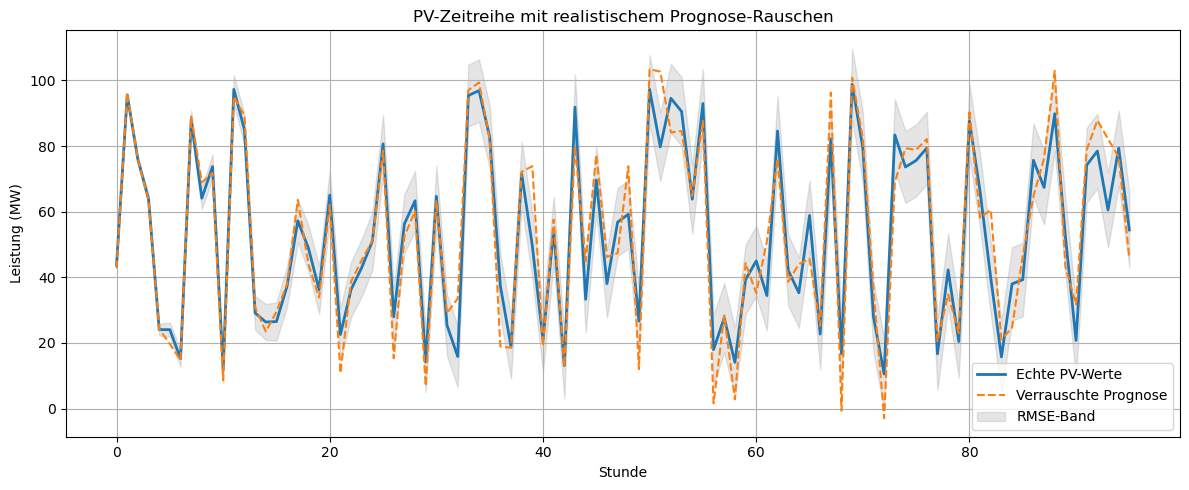

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# 1. Erzeuge zufällige echte PV-Zeitreihe in MW
np.random.seed(42)
real_pv = np.random.uniform(low=10, high=100, size=96)  # z. B. 10–100 MW

# 2. RMSE-Werte aus Tabelle (LSTM z. B.)
horizons = np.array([0, 24, 48, 72, 96])
mse_values = np.array([0, 0.108, 0.152, 0.166, 0.185])
rmse_standardized = np.sqrt(mse_values)

# 3. Rückskalieren auf reale MW-Einheit
# Nehmen wir an, reale PV-Werte haben Standardabweichung ≈ 25 MW (alternativ: berechne aus real_pv)
scaling_factor = np.std(real_pv)  # besser realistisch als fix
rmse_MW = rmse_standardized * scaling_factor

# 4. Interpolation der RMSE auf 96 Stunden
interp_rmse = interp1d(horizons, rmse_MW, kind='linear', fill_value='extrapolate')
rmse_per_hour = interp_rmse(np.arange(1, 97))

# 5. Generiere Rauschen und synthetische Vorhersage
noise = np.random.normal(loc=0, scale=rmse_per_hour)
synthetic_forecast = real_pv + noise

# 6. Empirischer RMSE
empirical_rmse = np.sqrt(mean_squared_error(real_pv, synthetic_forecast))
print(f"Empirischer RMSE über 96h: {empirical_rmse:.2f} MW")

# 7. Plot
plt.figure(figsize=(12, 5))
plt.plot(real_pv, label='Echte PV-Werte', linewidth=2)
plt.plot(synthetic_forecast, label='Verrauschte Prognose', linestyle='--')
plt.fill_between(range(96),
                 real_pv - rmse_per_hour,
                 real_pv + rmse_per_hour,
                 color='gray', alpha=0.2, label='RMSE-Band')
plt.title('PV-Zeitreihe mit realistischem Prognose-Rauschen')
plt.xlabel('Stunde')
plt.ylabel('Leistung (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# 1. Erzeuge 144 echte Windwerte (zufällig)
np.random.seed(123)
real_wind = np.random.uniform(low=50, high=150, size=144)  # z. B. in MW

# 2. MSE-Werte für LSTM-Modell aus Tabelle bis 168h
horizons = np.array([0, 24, 48, 72, 96, 168, 144*3])
mse_values = np.array([0, 0.499, 0.794, 0.899, 0.943, 1.011, 1.211])
rmse_std = np.sqrt(mse_values)  # RMSE in Standardform




In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

error_std = [[], [], [], [], []]
k=0
for i in [48, 72, 96, 168, 336]:  
    for j in range(0, 1000):
        # 1. Erzeuge 144 echte Windwerte (zufällig)
        #np.random.seed(123)
        real_wind = np.random.uniform(low=50, high=150, size=i)  # z. B. in MW

        # 2. MSE-Werte für LSTM-Modell aus Tabelle bis 168h
        horizons = np.array([0, 24, 48, 72, 96, 168, 336])
        #horizons = np.array([0, 24, 48, 72, 96, 168, 336])/2
        #mse_values = np.array([0, 0.499/2, 0.499+(0.794-0.499)/2, 0.794+(0.899-0.794)/2, 0.899+(0.943-0.899)/2, 0.943+(1.011-0.943)/2, 1.011+(1.064-0.943)/2])
        mse_values = np.array([0, 0.499, 0.794, 0.899, 0.943, 1.011, 1.064])
        rmse_std = np.sqrt(mse_values)  # RMSE in Standardform


        # 3. Skaliere RMSE auf echte MW-Einheit
        scaling_factor = np.std(real_wind)
        rmse_MW = rmse_std * scaling_factor

        # 4. Interpolation der RMSE auf 144h
        interp_rmse = interp1d(horizons, rmse_MW, kind='cubic', fill_value='extrapolate')
        rmse_per_hour = interp_rmse(np.arange(0, i, 1))  # Stunden 1–144
        test = np.linspace(1.4, 1, 168)
        ones = np.ones(168)
        test =  np.concatenate((test, ones))
        # 5. Rauschen generieren und synthetische Prognose erzeugen
        noise = np.random.normal(loc=0, scale=test[:i]*rmse_per_hour)
        synthetic_forecast = noise + real_wind
        synthetic_forecast = synthetic_forecast.clip(min=0)

        # 6. Empirischen RMSE berechnen
        empirical_rmse = np.sqrt(mean_squared_error(real_wind, synthetic_forecast))
        #print(f"Empirischer RMSE über 144h: {empirical_rmse:.2f} MW")

        # 7. standardized error
        y_true_std = (real_wind - np.mean(real_wind) ) / np.std(real_wind)
        y_pred_std = (synthetic_forecast - np.mean(real_wind)) / np.std(real_wind)

        mse_standardized = np.mean((y_true_std - y_pred_std) ** 2)
        
        error_std[k].append(mse_standardized)
        
        #print(f"Empirischer RMSE über 144h: {mse_standardized:.2f} MW")
    '''
        plt.figure(figsize=(14, 5))
        plt.plot(real_wind, label='Echte Wind-Leistung', linewidth=2)
        plt.plot(synthetic_forecast, label='Verrauschte Prognose', linestyle='--')
        plt.fill_between(range(i),
                        real_wind - rmse_per_hour,
                        real_wind + rmse_per_hour,
                        color='gray', alpha=0.2, label='RMSE-Band')
        plt.title('Wind-Zeitreihe mit synthetischem Prognosefehler (LSTM, bis 144h)')
        plt.xlabel('Stunde')
        plt.ylabel('Leistung (MW)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    '''
    k = k+1

In [115]:
for i in range(0,5):
    print("STD own:   ", np.mean(error_std[i]).round(3))
    print("STD paper: ", mse_values[i+2])
    print()

STD own:    0.756
STD paper:  0.794

STD own:    0.942
STD paper:  0.899

STD own:    1.043
STD paper:  0.943

STD own:    1.08
STD paper:  1.011

STD own:    1.059
STD paper:  1.064

